ression 단순 회귀 분석 사용하여 1970년 후반과 1980년대 초반의 자동차 연비(MPG)를 예문제 정의: LinearReg측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


[step1] 데이터준비=read.csv()함수로 자동차 연비 데이터 셋 가져오기

In [3]:
# csv파일을 데이터프레임으로 변환
df=pd.read_csv('auto-mpg.csv', header=None)

In [4]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']


In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


[step2] 데이터 탐색 및 데이터 전처리

In [6]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
#horsepower 열의 자료형 변경 (문자열->숫자)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
# ? 를 np.nan으로
df['horsepower'].replace('?',np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# 누락 데이터를 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [10]:
#문자열->숫자로 변환
df['horsepower']=df['horsepower'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


[step3] 속성 (feature 또는 variable) 선택

In [12]:
# 분석에 활용할 속성을 선택 (연비, 실린더, 마력, 중량)
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


[step4] 데이터셋 구분- 훈련용(train data)/ 검증용(test data)

In [13]:
# 속성(변수) 선택 -> 단순회귀
X=ndf[['weight']] #독립변수 2차원이라 [[]] 두번써
y=ndf['mpg']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,              #독립 변수
                                                    y,              #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10)  #랜덤 추출 값


[step5] 단순회귀분석 모형-sklearn사용

In [15]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성 후 학습 시기키
Ir=LinearRegression().fit(X_train,y_train)

[step6] 성능 평가하기


In [16]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산-> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단
r_square=Ir.score(X_test,y_test)
r_square

0.6822458558299322

In [29]:
# 모형에 전체 X데이터를 입력하여 예측한 값 y_hat으로 담기
y_hat=Ir.predict(X)

In [30]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat으로 담기
y_hat_test=Ir.predict(X_test)

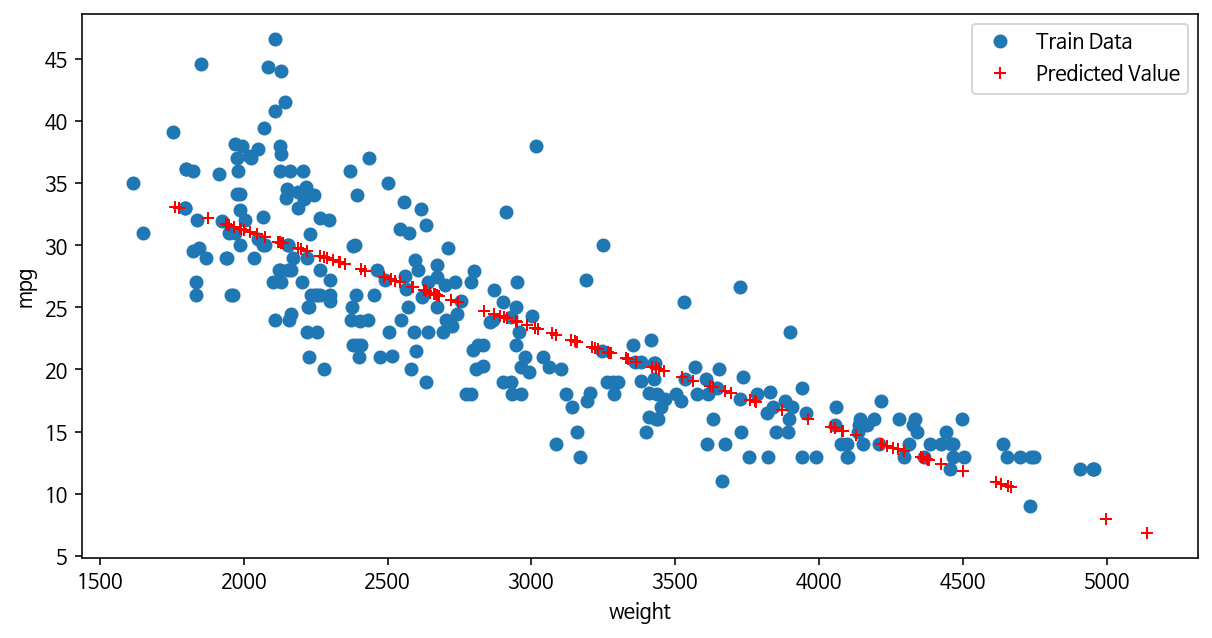

In [31]:
# train 데이터 (X_train)의 산점도와 test 데이터로 예측한 (y_hat_test) 회귀선을 그래프로 출력

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,'o',label='Train Data') #데이터의 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') #모형이 예측한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [32]:
print('훈련 세트 정확도 : {:.2f}%'.format(Ir.score(X_train,y_train)*100))
print('xptmxm 세트 정확도 : {:.2f}%'.format(Ir.score(X_test,y_test)*100))

훈련 세트 정확도 : 69.17%
xptmxm 세트 정확도 : 68.22%


Text(0.5, 1.0, 'LinearRegression 단순 회귀 분석 자동차 연비(MPG)예측')

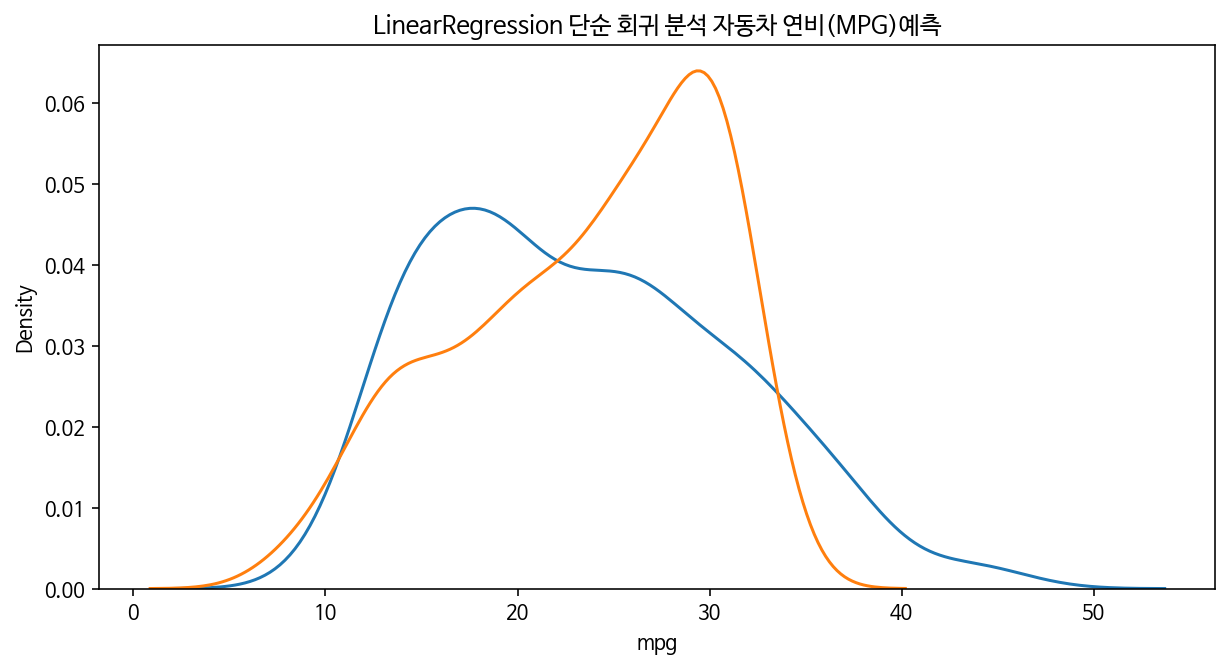

In [33]:
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y, label='y')
ax2=sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.title('LinearRegression 단순 회귀 분석 자동차 연비(MPG)예측')